In [1]:
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
forcing_path = '/gpfsm/dhome/jjbuseck/jjbuseck/model_forcing/JRA55-do-1-3/v20180412/padded_dataset/prra_input4MIPs_atmosphericState_OMIP_MRI-JRA55-do-1-3_gn_195801010130-195901010000.padded.nc'
output_path = '/gpfsm/dhome/jjbuseck/jjbuseck/models/MOM6_dev/geoclim-mom6/MOM6_SIS2_COBALT/BOM_0125_JRA_1.3/dynamics2d_weekly__1958_001.nc'

ds_forcing = xr.open_mfdataset(forcing_path, use_cftime=True).prra
ds_forcing

/discover/nobackup/jjbuseck/code/miniconda/envs/mom6_design/lib/python3.7/site-packages/xarray/backends/api.py:783: FutureWarning: In xarray version 0.13 `auto_combine` will be deprecated.
  coords=coords)
/discover/nobackup/jjbuseck/code/miniconda/envs/mom6_design/lib/python3.7/site-packages/xarray/backends/api.py:783: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset` to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in in future, please use the
new `combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  coords=coords)


<xarray.DataArray 'prra' (time: 2929, lat: 320, lon: 640)>
dask.array<shape=(2929, 320, 640), dtype=float32, chunksize=(2929, 320, 640)>
Coordinates:
  * time     (time) object 1958-01-01 00:00:00 ... 1959-01-01 22:30:00
  * lat      (lat) float64 -89.57 -89.01 -88.45 -87.89 ... 88.45 89.01 89.57
  * lon      (lon) float64 0.0 0.5625 1.125 1.688 ... 357.8 358.3 358.9 359.4
Attributes:
    standard_name:  rainfall_flux
    long_name:      Rainfall Flux
    comment:        In accordance with common usage in geophysical discipline...
    units:          kg m-2 s-1
    cell_methods:   area: time: mean
    cell_measures:  area: areacella

In [3]:
ds_output = xr.open_dataset(output_path).precip
ds_output

<xarray.DataArray 'precip' (time: 24, yh: 2240, xh: 2880)>
[154828800 values with dtype=float32]
Coordinates:
  * xh       (xh) float64 -298.6 -298.5 -298.4 -298.3 ... 61.05 61.16 61.28
  * yh       (yh) float64 -83.62 -83.58 -83.54 -83.5 ... 89.81 89.86 89.92 89.97
  * time     (time) object 1958-01-01 00:30:00 ... 1958-01-01 23:30:00
Attributes:
    long_name:      Liquid + frozen precipitation into ocean
    units:          kg m-2 s-1
    cell_methods:   area:mean yh:mean xh:mean time: mean
    cell_measures:  area: area_t
    time_avg_info:  average_T1,average_T2,average_DT

In [19]:
ds_forcing.time[0]

<xarray.DataArray 'time' ()>
array(cftime.DatetimeGregorian(1958, 1, 1, 0, 0, 0, 0, 2, 1), dtype=object)
Coordinates:
    time     object 1958-01-01 00:00:00
Attributes:
    axis:           T
    bounds:         time_bnds
    long_name:      time
    standard_name:  time
    modulo:          
    modulo_beg:     1958-01-01 00:00:00
    modulo_end:     2018-01-01 00:00:00

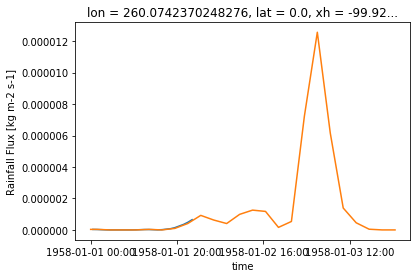

In [20]:
ts_out = ds_output.sel(yh=0, xh=-100,method='nearest')
ts_out.plot()

ts_forcing = ds_forcing.interp(lon=ts_out.xh+360, lat=ts_out.yh).sel(time=slice(None, '1958-01-03'))
ts_forcing.plot()

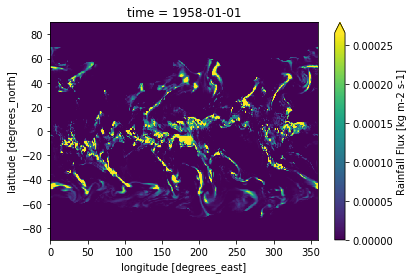

In [12]:
ds_forcing.isel(time=0).plot(robust=True)

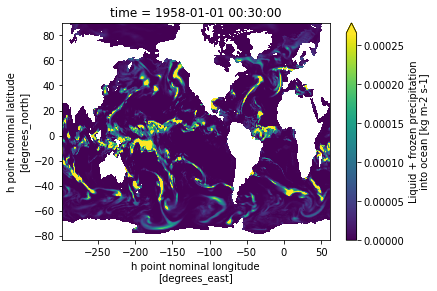

In [13]:
ds_output.isel(time=0).plot(robust=True)

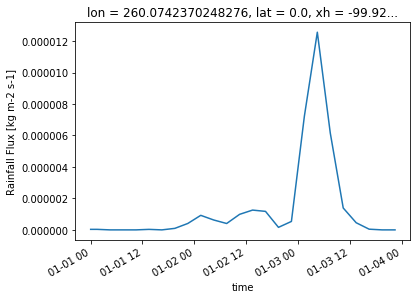